In [192]:
import pandas as pd
import geopandas as gpd
import numpy as np
import cartopy.crs as ccrs
# See lots of columns
pd.options.display.max_columns = 999

# Hide warnings due to issue in shapely package 
# See: https://github.com/shapely/shapely/issues/1345
np.seterr(invalid="ignore");

# Assignment 3

This assignment will contain two parts:

1. Exploring evictions and code violations in Philadelphia
2. Comparing the NDVI in Philadelphia

## Part 1: Exploring Evictions and Code Violations in Philadelphia

In this assignment, we'll explore spatial trends evictions in Philadelphia using data from the [Eviction Lab](https://evictionlab.org/) and building code violations using data from [OpenDataPhilly](https://www.opendataphilly.org/).

We'll be exploring the idea that evictions can occur as retaliation against renters for reporting code violations. Spatial correlations between evictions and code violations from the City's Licenses and Inspections department can offer some insight into this question. 

**A couple of interesting background readings:**
- [HuffPost article](https://www.huffingtonpost.com/entry/cities-are-starting-to-pay-attention-to-the-eviction-crisis-thats-devastated-poor-tenants_us_5b1a7b21e4b0bbb7a0dbd59e)
- [PlanPhilly article](http://planphilly.com/articles/2018/04/12/philly-landlords-evict-more-people-than-owners-in-other-large-cities)

## 1.1 Explore Eviction Lab Data

The Eviction Lab built the first national database for evictions. If you aren't familiar with the project, you can explore their website: https://evictionlab.org/ 

### 1.1.1 Read data using `geopandas`

The first step is to read the eviction data by census tract using `geopandas`. The data for all of Pennsylvania by census tract is available in the `data/` folder in a GeoJSON format.

Load the data file "PA-tracts.geojson" using `geopandas`

**Note:** If you'd like to see all columns in the data frame, you can increase the max number of columns using pandas display options:

In [3]:
PA_Tracts = gpd.read_file("data/PA-tracts.geojson")

In [5]:
PA_Tracts.head()

GEOID     west    south     east    north        n  \
0  42003412002 -80.1243  40.5422 -80.0640  40.5890  4120.02   
1  42003413100 -80.0681  40.5850 -79.9906  40.6143     4131   
2  42003413300 -80.0657  40.5527 -80.0210  40.5721     4133   
3  42003416000 -79.8113  40.5440 -79.7637  40.5630     4160   
4  42003417200 -79.7948  40.5341 -79.7642  40.5443     4172   

                               pl     p-00  pr-00  roh-00  pro-00  mgr-00  \
0  Allegheny County, Pennsylvania  4748.59   0.88    58.0    3.66  949.31   
1  Allegheny County, Pennsylvania  6771.01   3.47   729.0   28.75  674.10   
2  Allegheny County, Pennsylvania  5044.59   2.99   119.0    6.68  938.08   
3  Allegheny County, Pennsylvania  1775.93   4.99   121.0   15.30  557.90   
4  Allegheny County, Pennsylvania  1428.03  11.95   321.0   48.27  409.00   

     mhi-00     mpv-00  rb-00  pw-00  paa-00  ph-00  pai-00  pa-00  pnp-00  \
0  89226.06  195358.33  22.82  94.89    0.84   0.43    0.06   2.83    0.33   
1  75492.65  193726.88  21.39  91.61    1.81   0.94    0.03   4.85    0.01   
2  60019.14  131521.90  28.36  97.15    0.37   0.49    0.12   1.61    0.00   
3  39073.61   77316.48  17.60  99.50    0.06   0.11    0.00   0.00    0.00   
4  34306.14   66400.38  22.10  98.46    0.63   0.28    0.07   0.07    0.00   

   pm-00  po-00  ef-00  e-00  er-00  efr-00  lf-00  imputed-00  subbed-00  \
0   0.62   0.00    1.0   1.0   1.73    1.73    0.0         0.0        0.0   
1   0.66   0.07   10.0   4.0   0.55    1.37    0.0         0.0        0.0   
2   0.26   0.00    2.0   1.0   0.84    1.68    0.0         0.0        0.0   
3   0.33   0.00    1.0   1.0   0.83    0.83    0.0         0.0        0.0   
4   0.35   0.14    9.0   7.0   2.18    2.80    0.0         0.0        0.0   

      p-01  pr-01  roh-01  pro-01  mgr-01    mhi-01     mpv-01  rb-01  pw-01  \
0  4748.59   0.88    59.0    3.66  949.31  89226.06  195358.33  22.82  94.89   
1  6771.01   3.47   724.0   28.75  674.10  75492.65  193726.88  21.39  91.61   
2  5044.59   2.99   125.0    6.68  938.08  60019.14  131521.90  28.36  97.15   
3  1775.93   4.99   123.0   15.30  557.90  39073.61   77316.48  17.60  99.50   
4  1428.03  11.95   322.0   48.27  409.00  34306.14   66400.38  22.10  98.46   

   paa-01  ph-01  pai-01  pa-01  pnp-01  pm-01  po-01  ef-01  e-01  er-01  \
0    0.84   0.43    0.06   2.83    0.33   0.62   0.00    0.0   0.0   0.00   
1    1.81   0.94    0.03   4.85    0.01   0.66   0.07   16.0  11.0   1.52   
2    0.37   0.49    0.12   1.61    0.00   0.26   0.00    2.0   2.0   1.60   
3    0.06   0.11    0.00   0.00    0.00   0.33   0.00    3.0   3.0   2.44   
4    0.63   0.28    0.07   0.07    0.00   0.35   0.14   12.0   4.0   1.24   

   efr-01  lf-01  imputed-01  subbed-01     p-02  pr-02  roh-02  pro-02  \
0    0.00    0.0         0.0        0.0  4748.59   0.88    60.0    3.66   
1    2.21    0.0         0.0        0.0  6771.01   3.47   719.0   28.75   
2    1.60    0.0         0.0        0.0  5044.59   2.99   131.0    6.68   
3    2.44    0.0         0.0        0.0  1775.93   4.99   125.0   15.30   
4    3.73    0.0         0.0        0.0  1428.03  11.95   323.0   48.27   

   mgr-02    mhi-02     mpv-02  rb-02  pw-02  paa-02  ph-02  pai-02  pa-02  \
0  949.31  89226.06  195358.33  22.82  94.89    0.84   0.43    0.06   2.83   
1  674.10  75492.65  193726.88  21.39  91.61    1.81   0.94    0.03   4.85   
2  938.08  60019.14  131521.90  28.36  97.15    0.37   0.49    0.12   1.61   
3  557.90  39073.61   77316.48  17.60  99.50    0.06   0.11    0.00   0.00   
4  409.00  34306.14   66400.38  22.10  98.46    0.63   0.28    0.07   0.07   

   pnp-02  pm-02  po-02  ef-02  e-02  er-02  efr-02  lf-02  imputed-02  \
0    0.33   0.62   0.00    3.0   0.0   0.00    4.99    0.0         0.0   
1    0.01   0.66   0.07   22.0  17.0   2.37    3.06    0.0         0.0   
2    0.00   0.26   0.00    0.0   0.0   0.00    0.00    0.0         0.0   
3    0.00   0.33   0.00    3.0   3.0   2.41    2.41    0.0         0.0   
4

### 1.1.2 Explore and trim the data 

We will need to trim data to Philadelphia only. Take a look at the data dictionary for the descriptions of the various columns in top-level repository folder: `eviction_lab_data_dictionary.txt`

**Note:** the column names are shortened — see the end of the above file for the abbreviations. The numbers at the end of the columns indicate the years. For example, `e-16` is the number of evictions in 2016. 

Take a look at the individual columns and trim to census tracts in Philadelphia. (**Hint:** Philadelphia is both a city and a county).

In [6]:
Philly_data = PA_Tracts[(PA_Tracts['pl'] == 'Philadelphia County, Pennsylvania')]

Philly_data.head()


GEOID     west    south     east    north     n  \
435  42101000100 -75.1523  39.9481 -75.1415  39.9569     1   
436  42101000200 -75.1631  39.9529 -75.1511  39.9578     2   
437  42101000300 -75.1798  39.9544 -75.1623  39.9599     3   
438  42101000801 -75.1833  39.9486 -75.1773  39.9515  8.01   
439  42101000804 -75.1712  39.9470 -75.1643  39.9501  8.04   

                                    pl     p-00  pr-00  roh-00  pro-00  \
435  Philadelphia County, Pennsylvania  2646.71   9.26  1347.0   77.12   
436  Philadelphia County, Pennsylvania  1362.00  56.42   374.0   81.48   
437  Philadelphia County, Pennsylvania  2570.00  12.16   861.0   69.49   
438  Philadelphia County, Pennsylvania  1478.00  14.40   810.0   73.65   
439  Philadelphia County, Pennsylvania  3301.00  14.40  2058.0   73.65   

     mgr-00   mhi-00    mpv-00  rb-00  pw-00  paa-00  ph-00  pai-00  pa-00  \
435   959.0  48886.0  189700.0   24.5  78.45   12.42   3.47    0.23   3.92   
436   421.0   8349.0   55600.0   31.2  11.16    5.21   1.69    0.07  79.59   
437   688.0  40625.0  233900.0   29.0  70.86   14.67   3.81    0.27   7.00   
438   933.0  42346.0  265200.0   27.6  81.67    2.97   3.50    0.04  10.08   
439   933.0  42346.0  265200.0   27.6  81.67    2.97   3.50    0.04  10.08   

     pnp-00  pm-00  po-00  ef-00  e-00  er-00  efr-00  lf-00  imputed-00  \
435    0.00   1.40   0.11    NaN   NaN    NaN     NaN    0.0         0.0   
436    0.07   2.20   0.00    NaN   NaN    NaN     NaN    0.0         0.0   
437    0.08   3.04   0.27    NaN   NaN    NaN     NaN    0.0         0.0   
438    0.04   1.26   0.45    NaN   NaN    NaN     NaN    0.0         0.0   
439    0.04   1.26   0.45    NaN   NaN    NaN     NaN    0.0         0.0   

     subbed-00     p-01  pr-01  roh-01  pro-01  mgr-01   mhi-01    mpv-01  \
435        0.0  2646.71   9.26  1360.0   77.12   959.0  48886.0  189700.0   
436        0.0  1362.00  56.42   415.0   81.48   421.0   8349.0   55600.0   
437        0.0  2570.00  12.16   915.0   69.49   688.0  40625.0  233900.0   
438        0.0  1478.00  14.40   801.0   73.65   933.0  42346.0  265200.0   
439        0.0  3301.00  14.40  2050.0   73.65   933.0  42346.0  265200.0   

     rb-01  pw-01  paa-01  ph-01  pai-01  pa-01  pnp-01  pm-01  po-01  ef-01  \
435   24.5  78.45   12.42   3.47    0.23   3.92    0.00   1.40   0.11    NaN   
436   31.2  11.16    5.21   1.69    0.07  79.59    0.07   2.20   0.00    NaN   
437   29.0  70.86   14.67   3.81    0.27   7.00    0.08   3.04   0.27    NaN   
438   27.6  81.67    2.97   3.50    0.04  10.08    0.04   1.26   0.45    NaN   
439   27.6  81.67    2.97   3.50    0.04  10.08    0.04   1.26   0.45    NaN   

     e-01  er-01  efr-01  lf-01  imputed-01  subbed-01     p-02  pr-02  \
435   NaN    NaN     NaN    0.0         0.0        0.0  2646.71   9.26   
436   NaN    NaN     NaN    0.0         0.0        0.0  1362.00  56.42   
437   NaN    NaN     NaN    0.0         0.0        0.0  2570.00  12.16   
438   NaN    NaN     NaN    0.0         0.0        0.0  1478.00  14.40   
439   NaN    NaN     NaN    0.0         0.0        0.0  3301.00  14.40   

     roh-02  pro-02  mgr-02   mhi-02    mpv-02  rb-02  pw-02  paa-02  ph-02  \
435  1374.0   77.12   959.0  48886.0  189700.0   24.5  78.45   12.42   3.47   
436   455.0   81.48   421.0   8349.0   55600.0   31.2  11.16    5.21   1.69   
437   969.0   69.49   688.0  40625.0  233900.0   29.0  70.86   14.67   3.81   
438   793.0   73.65   933.0  42346.0  265200.0   27.6  81.67    2.97   3.50   
439  2042.0   73.65   933.0  42346.0  265200.0   27.6  81.67    2.97   3.50   

     pai-02  pa-02  pnp-02  pm-02  po-02  ef-02  e-02  er-02  efr-02  lf-02  \
435    0.23   3.92    0.00   1.40   0.11   21.0  19.0   1.38    1.53    1.0   
436    0.07  79.59    0.07   2.20   0.00    4.0   4.0   0.88    0.88    1.0   
437    0.27   7.00    0.08   3.04   0.27   14.0  12.0   1.24    1.44    1.0   
438    0.04  10.08    0.04   1.26   0.45    7.0   5.0   0.63    0.88    1.0   
439    0

### 1.1.3 Transform from wide to tidy format

For this assignment, we are interested in the number of evictions by census tract for various years. Right now, each year has it's own column, so it will be easiest to transform to a tidy format. 

Use the `pd.melt()` function to transform the eviction data into tidy format, using the number of evictions from **2003 to 2016**.

The tidy data frame should have four columns: `GEOID`, `geometry`, a column holding the number of evictions, and a column telling you what the name of the original column was for that value.

**Hints:**
- You'll want to specify the `GEOID` and `geometry` columns as the `id_vars`. This will keep track of the census tract information. 
- You should specify the names of the columns holding the number of evictions as the `value_vars`.
- You can generate a list of this column names using Python's f-string formatting:
    ```python
    value_vars = [f"e-{x:02d}" for x in range(3, 17)]
    ```

In [104]:
# Generate a list of column names 
value_vars = [f"e-{x:02d}" for x in range(3, 17)]

# Specify GeoID and geometer as id_vars
id_vars = ['GEOID', 'geometry']

# Use pd.melt() to transform the data into tidy format
tidy_data = pd.melt(Philly_data, id_vars=id_vars, value_vars=value_vars, var_name='year', value_name='evictions')

# Extract the last two digits from the 'year'
tidy_data['year'] = tidy_data['year'].str[-2:]

# Convert the two digits to a full year format
tidy_data['year'] = '20' + tidy_data['year']

tidy_data.head()

GEOID                                           geometry  year  \
0  42101000100  MULTIPOLYGON (((-75.14161 39.95549, -75.14163 ...  2003   
1  42101000200  MULTIPOLYGON (((-75.15122 39.95686, -75.15167 ...  2003   
2  42101000300  MULTIPOLYGON (((-75.16234 39.95782, -75.16237 ...  2003   
3  42101000801  MULTIPOLYGON (((-75.17732 39.95096, -75.17784 ...  2003   
4  42101000804  MULTIPOLYGON (((-75.17118 39.94778, -75.17102 ...  2003   

   evictions  
0       21.0  
1        3.0  
2       17.0  
3       13.0  
4       21.0

### 1.1.4 Plot the total number of evictions per year from 2003 to 2016

Use `hvplot` to plot the total number of evictions from 2003 to 2016. You will first need to perform a group by operation and sum up the total number of evictions for all census tracts, and then use `hvplot()` to make your plot.

You can use any type of `hvplot` chart you'd like to show the trend in number of evictions over time.

In [98]:
#pip install hvplot
import hvplot.pandas


# Group by 'year' and calculate the sum of evictions for each year
evictions_by_year = tidy_data.groupby('year')['evictions'].sum().reset_index()

# plot with hvplot
evictions_by_year.hvplot.bar(
    x='year',
    y='evictions',
    crs=3857,
    geo=True,
    gridsize=40, 
    alpha=0.5,
    title='Total Evictions per Year (2003-2016)',
    xlabel='Year',
    ylabel='Total Evictions',
    frame_width=600,
    frame_height=600,
    cmap="viridis"
)



:Bars   [year]   (evictions)

### 1.1.5 The number of evictions across Philadelphia

Our tidy data frame is still a GeoDataFrame with a geometry column, so we can visualize the number of evictions for all census tracts. 

Use `hvplot()` to generate a choropleth showing the number of evictions for a specified year, with a widget dropdown to select a given year (or variable name, e.g., `e-16`, `e-15`, etc). 

**Hints** 
- You'll need to use the `groupby` keyword to tell `hvplot` to make a series of maps, with a widget to select between them.
- You will need to specify `dynamic=False` as a keyword argument to the `hvplot()` function. 
- Be sure to specify a `width` and `height` that makes your output map (roughly) square to limit distortions

In [114]:
# Choropleth

choropleth = tidy_data.hvplot(                 
    c='evictions',      
    groupby='year',
    geo=True,
    #projection = ccrs.epsg(3857),
    width=600, 
    height=600, 
    cmap='viridis',
    dynamic=False,
)

choropleth

:HoloMap   [year]
   :Polygons   [Longitude,Latitude]   (evictions)

## 1.2 Code Violations in Philadelphia

Next, we'll explore data for code violations from the Licenses and Inspections Department of Philadelphia to look for potential correlations with the number of evictions.


### 1.2.1 Load data from 2012 to 2016

L+I violation data for years including 2012 through 2016 (inclusive) is provided in a CSV format in the "data/" folder. 

Load the data using pandas and convert to a GeoDataFrame.

In [28]:
Violation = pd.read_csv('data/li_violations.csv')

# Remove rows with missing geometry
Violation = Violation.dropna(subset=["lat", "lng"])

# Create our GeoDataFrame with geometry column created from lon/lat
GeoViolation = gpd.GeoDataFrame(
    Violation,
    geometry=gpd.points_from_xy(Violation["lng"], Violation["lat"]),
    crs="EPSG:4326",
)

GeoViolation.head()

lat        lng            violationdescription  \
0  40.050526 -75.126076           CLIP VIOLATION NOTICE   
1  40.050593 -75.126578       LICENSE-CHANGE OF ADDRESS   
2  40.050593 -75.126578             LICENSE-RES SFD/2FD   
3  39.991994 -75.128895        EXT A-CLEAN WEEDS/PLANTS   
4  40.023260 -75.164848  EXT A-VACANT LOT CLEAN/MAINTAI   

                     geometry  
0  POINT (-75.12608 40.05053)  
1  POINT (-75.12658 40.05059)  
2  POINT (-75.12658 40.05059)  
3  POINT (-75.12889 39.99199)  
4  POINT (-75.16485 40.02326)

### 1.2.2 Trim to specific violation types

There are many different types of code violations (running the `nunique()` function on the `violationdescription` column will extract all of the unique ones). More information on different types of violations can be found [on the City's website](https://www.phila.gov/li/codesandregulations/Pages/codes.aspx).

Below, I've selected 15 types of violations that deal with property maintenance and licensing issues. We'll focus on these violations. The goal is to see if these kinds of violations are correlated spatially with the number of evictions in a given area. 

Use the list of violations given to trim your data set to only include these types.

In [29]:
violation_types = [
    "INT-PLMBG MAINT FIXTURES-RES",
    "INT S-CEILING REPAIR/MAINT SAN",
    "PLUMBING SYSTEMS-GENERAL",
    "CO DETECTOR NEEDED",
    "INTERIOR SURFACES",
    "EXT S-ROOF REPAIR",
    "ELEC-RECEPTABLE DEFECTIVE-RES",
    "INT S-FLOOR REPAIR",
    "DRAINAGE-MAIN DRAIN REPAIR-RES",
    "DRAINAGE-DOWNSPOUT REPR/REPLC",
    "LIGHT FIXTURE DEFECTIVE-RES",
    "LICENSE-RES SFD/2FD",
    "ELECTRICAL -HAZARD",
    "VACANT PROPERTIES-GENERAL",
    "INT-PLMBG FIXTURES-RES",
]

In [30]:
trimed_GeoV = GeoViolation[GeoViolation['violationdescription'].isin(violation_types)]

trimed_GeoV.head()

lat        lng            violationdescription  \
2   40.050593 -75.126578             LICENSE-RES SFD/2FD   
25  40.022406 -75.121872               EXT S-ROOF REPAIR   
30  40.023237 -75.121726              CO DETECTOR NEEDED   
31  40.023397 -75.122241  INT S-CEILING REPAIR/MAINT SAN   
34  40.023773 -75.121603              INT S-FLOOR REPAIR   

                      geometry  
2   POINT (-75.12658 40.05059)  
25  POINT (-75.12187 40.02241)  
30  POINT (-75.12173 40.02324)  
31  POINT (-75.12224 40.02340)  
34  POINT (-75.12160 40.02377)

### 1.2.3 Make a hex bin map

The code violation data is **point data**. We can get a quick look at the geographic distribution using `matplotlib` and the `hexbin()` function. Make a hex bin map of the code violations and overlay the census tract outlines. 

**Hints**:
- The eviction data from part 1 was by census tract, so the census tract geometries are available as part of that GeoDataFrame. You can use it to overlay the census tracts on your hex bin map.
- Make sure you convert your GeoDataFrame to a CRS that's better for visualization than plain old 4326.

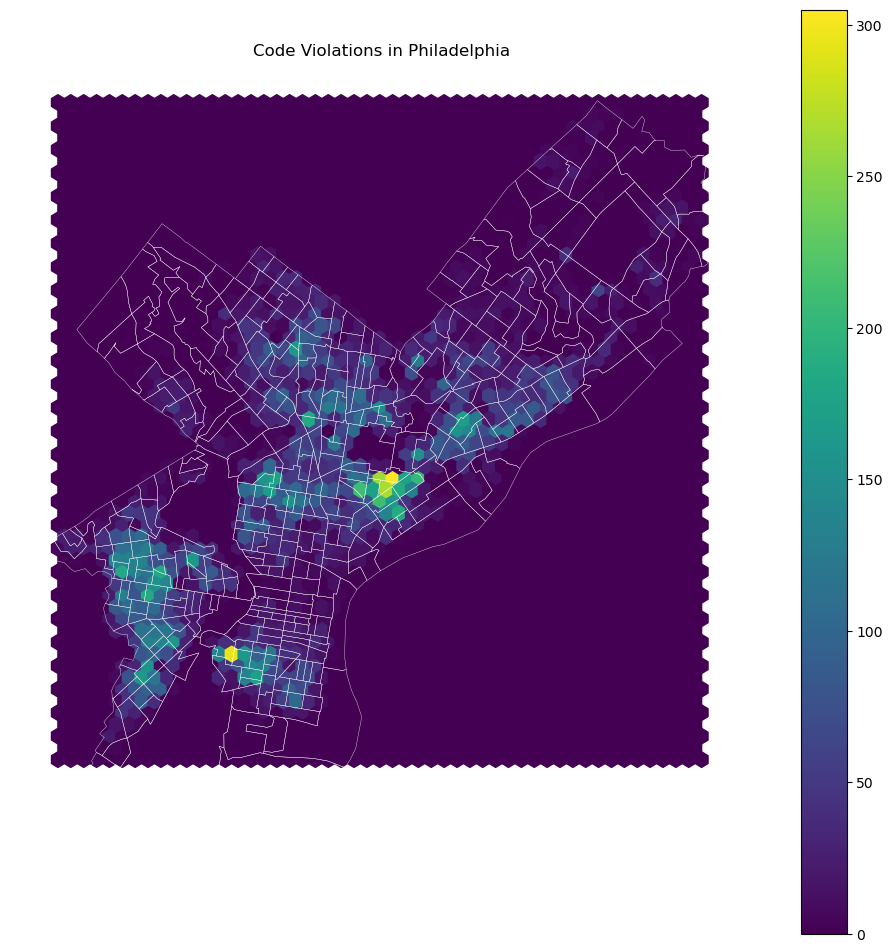

In [31]:
# Convert to crs 3857 for a better visualization
trimed_GeoV = trimed_GeoV.to_crs(epsg=3857)

import matplotlib.pyplot as plt

# Create the axes
fig, ax = plt.subplots(figsize=(12, 12))

# Extract out the x/y coordindates of the Point objects
xcoords = trimed_GeoV.geometry.x
ycoords = trimed_GeoV.geometry.y

# Plot hex bin
hex_violation = ax.hexbin(xcoords, ycoords, gridsize=50)

# Add the zillow geometry boundaries
Philly_data.to_crs(trimed_GeoV.crs).plot(
    ax=ax, facecolor="none", edgecolor="white", linewidth=0.25
)
# Add a colorbar and format
fig.colorbar(hex_violation, ax=ax)
ax.set_title("Code Violations in Philadelphia")
ax.set_axis_off()
ax.set_aspect("equal")                         
                    

### 1.2.4 Spatially join data sets

To do a census tract comparison to our eviction data, we need to find which census tract each of the code violations falls into. Use the `geopandas.sjoin()` function to do just that. 


**Hints**
- You can re-use your eviction data frame, but you will only need the `geometry` column (specifying census tract polygons) and the `GEOID` column (specifying the name of each census tract).
- Make sure both data frames have the same CRS before joining them together!

In [33]:
#Make sure the two GeoDataFrames are in the same CRS

violation_wTract = gpd.sjoin(
    GeoViolation,
    tidy_data.to_crs(GeoViolation.crs), 
    predicate="within",
    how="left",
)

violation_wTract.head()

lat        lng   violationdescription                    geometry  \
0  40.050526 -75.126076  CLIP VIOLATION NOTICE  POINT (-75.12608 40.05053)   
0  40.050526 -75.126076  CLIP VIOLATION NOTICE  POINT (-75.12608 40.05053)   
0  40.050526 -75.126076  CLIP VIOLATION NOTICE  POINT (-75.12608 40.05053)   
0  40.050526 -75.126076  CLIP VIOLATION NOTICE  POINT (-75.12608 40.05053)   
0  40.050526 -75.126076  CLIP VIOLATION NOTICE  POINT (-75.12608 40.05053)   

   index_right        GEOID  year  evictions  
0          364  42101027100  2003        6.0  
0          748  42101027100  2004        8.0  
0         1132  42101027100  2005        6.0  
0         1516  42101027100  2006        8.0  
0         1900  42101027100  2007        4.0

### 1.2.5 Calculate the number of violations by type per census tract

Next, we'll want to find the number of violations (for each kind) per census tract. You should group the data frame by violation type and census tract name.

The result of this step should be a data frame with three columns: `violationdescription`, `GEOID`, and `N`, where `N` is the number of violations of that kind in the specified census tract.

**Optional: to make prettier plots**

Some census tracts won't have any violations, and they won't be included when we do the above calculation. However, there is a trick to set the values for those census tracts to be zero. After you calculate the sizes of each violation/census tract group, you can run: 

```python
N = N.unstack(fill_value=0).stack().reset_index(name='N')
```
where `N` gives the total size of each of the groups, specified by violation type and census tract name.

See [this StackOverflow post](https://stackoverflow.com/questions/42854801/including-missing-combinations-of-values-in-a-pandas-groupby-aggregation) for more details.

This part is **optional**, but will make the resulting maps a bit prettier.

In [34]:
N = violation_wTract.groupby(['violationdescription', 'GEOID']).size().reset_index(name='N')

N = N.pivot_table(index='GEOID', columns='violationdescription', values='N', fill_value=0).stack().reset_index(name='N')

N.head()

GEOID           violationdescription   N
0  42101000100  ADMINISTRATIVE -ID BARRICADES   0
1  42101000100        ADULT BOOK SALE/STORAGE   0
2  42101000100   ADVERTISING SIGN BUSINESS LO   0
3  42101000100   ADVERTISING SIGN BUSINESS LR   0
4  42101000100          AFCI RECEPTACLE REQ'D  14

### 1.2.6 Merge with census tracts geometries

We now have the number of violations of different types per census tract specified as a regular DataFrame. You can now merge it with the census tract geometries (from your eviction data GeoDataFrame) to create a GeoDataFrame. 

**Hints**
- Use `pandas.merge()` and specify the `on` keyword to be the column holding census tract names. 
- Make sure the result of the merge operation is a GeoDataFrame — you will want the GeoDataFrame holding census tract geometries to be the first argument of the `pandas.merge()` function.

In [121]:
# Set a dataframe only include geo
geo= Philly_data[["GEOID","geometry"]]

VCount_wTract = pd.merge(geo, N, on='GEOID', how='left')

VCount_wTract

GEOID                                           geometry  \
0       42101000100  MULTIPOLYGON (((-75.14161 39.95549, -75.14163 ...   
1       42101000100  MULTIPOLYGON (((-75.14161 39.95549, -75.14163 ...   
2       42101000100  MULTIPOLYGON (((-75.14161 39.95549, -75.14163 ...   
3       42101000100  MULTIPOLYGON (((-75.14161 39.95549, -75.14163 ...   
4       42101000100  MULTIPOLYGON (((-75.14161 39.95549, -75.14163 ...   
...             ...                                                ...   
515323  42101018400  MULTIPOLYGON (((-75.05902 39.99251, -75.05954 ...   
515324  42101018400  MULTIPOLYGON (((-75.05902 39.99251, -75.05954 ...   
515325  42101018400  MULTIPOLYGON (((-75.05902 39.99251, -75.05954 ...   
515326  42101018400  MULTIPOLYGON (((-75.05902 39.99251, -75.05954 ...   
515327  42101018400  MULTIPOLYGON (((-75.05902 39.99251, -75.05954 ...   

                  violationdescription   N  
0        ADMINISTRATIVE -ID BARRICADES   0  
1              ADULT BOOK SALE/STORAGE   0  
2         ADVERTISING SIGN BUSINESS LO   0  
3         ADVERTISING SIGN BUSINESS LR   0  
4                AFCI RECEPTACLE REQ'D  14  
...                                ...  ..  
515323  WIRE/EQUIP-REPLACE DEFEC/DAMAG   0  
515324      WORKMANLIKE- BUILDING CODE  42  
515325    WORKMANLIKE- ELECTRICAL CODE   0  
515326          WORKMANLIKE- FIRE CODE   0  
515327      WORKMANLIKE- PLUMBING CODE   0  

[515328 rows x 4 columns]

### 1.2.7 Interactive choropleths for each violation type

Now, we can use `hvplot()` to create an interactive choropleth for each violation type and add a widget to specify different violation types. 

**Hints** 
- You'll need to use the `groupby` keyword to tell `hvplot` to make a series of maps, with a widget to select different violation types.
- You will need to specify `dynamic=False` as a keyword argument to the `hvplot()` function. 
- Be sure to specify a `width` and `height` that makes your output map (roughly) square to limit distortions

In [122]:
# Increase the max_frames limit (the error message told me)
import holoviews as hv
hv.output(max_frames=1342)

VCount_wTract.hvplot(
    geo=True,                    
    groupby='violationdescription', 
    c='N',                   
    cmap='viridis',              
    hover_cols=['GEOID', 'N'],   
    width=1000,
    height=1000,
    dynamic=False,
    widget_location="bottom",
    #projection=ccrs.epsg(3857),
)


Column
    [0] HoloViews(HoloMap, height=1000, sizing_mode='fixed', widget_location='bottom', width=1000)
    [1] WidgetBox(align=('center', 'end'))
        [0] Select(margin=(20, 20, 20, 20), name='violationdescription', options=['ADMINISTRATIVE -ID BARRI...], value='ADMINISTRATIVE -..., width=250)

## 1.3. A side-by-side comparison

From the interactive maps of evictions and violations, you should notice a lot of spatial overlap. 

As a final step, we'll make a side-by-side comparison to better show the spatial correlations. This will involve a few steps: 

1. Trim the evictions data frame plotted in section 1.1.5 to only include evictions from 2016. 
2. Trim the L+I violations data frame plotted in section 1.2.7 to only include a single violation type (pick whichever one you want!).
3. Use `hvplot()` to make two interactive choropleth maps, one for the data from step 1. and one for the data in step 2.
4. Show these two plots side by side (one row and 2 columns) using the syntax for combining charts.

**Note:** since we selected a single year and violation type, you won't need to use the `groupby=` keyword here.

In [135]:
# 1. Filter the data in 2016
tidy_data_2016=tidy_data[(tidy_data['year']=='2016')]

# 2. I would like to select the violation type as INTERIOR SURFACES (for no reason)

selected_violation = "INTERIOR SURFACES"
violations_selected = VCount_wTract[VCount_wTract['violationdescription'] == selected_violation]

# 3. Plot Choropleth maps
    # for evictions in 2016
evictions_plot = tidy_data_2016.hvplot(
    geo=True,
    c='evictions',
    title='Evictions 2016',
    width=400,
    height=400,
    cmap="viridis"
)

    # for INTERIOR SURFACES violation type
violations_plot = violations_selected.hvplot(
    geo=True,
    c='N',
    title=f'Violations - INTERIOR SURFACES',
    width=400,
    height=400,
    cmap="inferno"
)

combined_plot = evictions_plot+violations_plot

combined_plot.cols(2)

:Layout
   .Polygons.I  :Polygons   [Longitude,Latitude]   (evictions)
   .Polygons.II :Polygons   [Longitude,Latitude]   (N)

## 1.4. Extra Credit

Identify the 20 most common types of violations within the time period of 2012 to 2016 and create a set of interactive choropleths similar to what was done in section 1.2.7. 

Use this set of maps to identify 3 types of violations that don't seem to have much spatial overlap with the number of evictions in the City.

In [179]:
# Count occurrences for each violation type
violation_counts = Violation['violationdescription'].value_counts().reset_index()

# Select the top 20 violation types
top_20_violations = violation_counts.head(20)

top_20_violations

index  violationdescription
0            CLIP VIOLATION NOTICE                 64811
1   EXT A-VACANT LOT CLEAN/MAINTAI                 32633
2                   HIGH WEEDS-CUT                 20504
3             LICENSE-VAC RES BLDG                 15278
4             VACANT PROP STANDARD                 12283
5   RUBBISH/GARBAGE EXTERIOR-OWNER                 11416
6      EXT A-CLEAN RUBBISH/GARBAGE                  8832
7              LICENSE-RES SFD/2FD                  8179
8         EXT A-CLEAN WEEDS/PLANTS                  7904
9              LICENSE-RES GENERAL                  7682
10     VACANT BLDG UNSECURED COUNT                  6614
11  INT S-CEILING REPAIR/MAINT SAN                  5146
12                VIOL C&I MESSAGE                  5031
13              CO DETECTOR NEEDED                  4934
14          ANNUAL CERT FIRE ALARM                  4611
15       LICENSE - RENTAL PROPERTY                  4226
16     VAC PROP REPLAC WIN/DRS 80%                  4147
17           SD-REQD EXIST GROUP R                  4052
18                 PERM Z- NEW USE                  3863
19   INT S-WALLS REPAIR/MAINT SANI                  3396

In [180]:
#top_20_violations['index'].value.tolist()
top_20_violations = Violation[GeoViolation['violationdescription'].isin(top_20_violations['index'])]

top_20_violations.head()


lat        lng            violationdescription
0  40.050526 -75.126076           CLIP VIOLATION NOTICE
2  40.050593 -75.126578             LICENSE-RES SFD/2FD
3  39.991994 -75.128895        EXT A-CLEAN WEEDS/PLANTS
4  40.023260 -75.164848  EXT A-VACANT LOT CLEAN/MAINTAI
5  40.023260 -75.164848  EXT A-VACANT LOT CLEAN/MAINTAI

## Part 2: Exploring the NDVI in Philadelphia

In this part, we'll explore the NDVI in Philadelphia a bit more. This part will include two parts:

1. We'll compare the median NDVI within the city limits and the immediate suburbs
1. We'll calculate the  NDVI around street trees in the city.

## 2.1 Comparing the NDVI in the city and the suburbs

### 2.1.1 Load Landsat data for Philadelphia

Use rasterio to load the landsat data for Philadelphia (available in the "data/" folder)

In [44]:
import rasterio as rio

landsat = rio.open("data/landsat8_philly.tif")

landsat

<open DatasetReader name='data/landsat8_philly.tif' mode='r'>

### 2.1.2 Separating the city from the suburbs

Create two polygon objects, one for the city limits and one for the suburbs. To calculate the suburbs polygon, we will take everything outside the city limits but still within the bounding box. 

* The city limits are available in the "data/" folder.
* To calculate the suburbs polygon, the "envelope" attribute of the city limits geometry will be useful.
* You can use geopandas' [geometric manipulation](https://geopandas.org/en/stable/docs/user_guide/geometric_manipulations.html) functionality to calculate the suburbs polygon from the city limits polygon and the envelope polygon.

In [45]:
# Load
city_limits = gpd.read_file("data/City_Limits.geojson")

# Unify the CRS
city_limits = city_limits.to_crs(epsg=landsat.crs.to_epsg())

suburbs_polygon = city_limits.envelope.difference(city_limits)
suburbs_polygon.explore()



### 2.1.3 Mask and calculate the NDVI for the city and the suburbs

Using the two polygons from the last section, use rasterio's mask functionality to create two masked arrays from the landsat data, one for the city and one for the suburbs. 

For each masked array, calculate the NDVI.

In [69]:
from rasterio.mask import mask

# Masking for the city
city_masked, city_transform = mask(
    dataset=landsat,            
    shapes=city_limits.geometry,  
    crop=True,                  
    all_touched=True,            
    filled=False,                 
)

city_red = city_masked[3]
city_nir = city_masked[4]


 
def calculate_NDVI1(city_nir, city_red):
    """
    Calculate the NDVI from the NIR and red landsat bands
    """

    # Convert to floats
    city_nir = city_nir.astype(float)
    city_red = city_red.astype(float)
    
    # Get valid entries
    check = np.logical_and(city_red.mask == False, city_nir.mask == False)

    # Where the check is True, return the NDVI, else return NaN
    ndvi = np.where(check, (city_nir - city_red) / (city_nir + city_red), np.nan)
    
    # Return
    return ndvi

# Calculate NDVI for the city
city_ndvi = calculate_NDVI1(city_nir, city_red)
print(city_ndvi)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [70]:
# Masking for the suburbs
suburbs_masked, suburbs_transform = mask(
    dataset=landsat,
    shapes=suburbs_polygon.geometry,
    crop=True,
    all_touched=True,
    filled=False
)


sub_red = suburbs_masked[3]
sub_nir = suburbs_masked[4]

def calculate_NDVI2(sub_nir, sub_red):
    """
    Calculate the NDVI from the NIR and red landsat bands
    """

    # Convert to floats
    sub_nir = sub_nir.astype(float)
    sub_red = sub_red.astype(float)
    
    # Get valid entries
    check = np.logical_and(sub_red.mask == False, sub_nir.mask == False)

    # Where the check is True, return the NDVI, else return NaN
    ndvi = np.where(check, (sub_nir - sub_red) / (sub_nir + sub_red), np.nan)
    
    # Return
    return ndvi

# Calculate NDVI for the suburbs
suburbs_ndvi = calculate_NDVI2(sub_nir, sub_red)

### 2.1.4 Calculate the median NDVI within the city and within the suburbs

* Calculate the median value from your NDVI arrays for the city and suburbs
* Numpy's `nanmedian` function will be useful for ignoring NaN elements
* Print out the median values. Which has a higher NDVI: the city or suburbs?

In [71]:
# Calculate the median NDVI for the city
city_median_ndvi = np.nanmedian(city_ndvi)

# Calculate the median NDVI for the suburbs
suburbs_median_ndvi = np.nanmedian(suburbs_ndvi)

print(city_median_ndvi)
print(suburbs_median_ndvi)

# The suburb's NDVI is higher!

0.20268593532493442
0.3746654463028859


## 2.2 Calculating the NDVI for Philadelphia's street treets

### 2.2.1 Load the street tree data

The data is available in the "data/" folder. It has been downloaded from [OpenDataPhilly](https://www.opendataphilly.org/dataset/ppr-tree-canopy). It contains the locations of abot 2,500 street trees in Philadelphia.

In [55]:
# Load
street_trees = gpd.read_file("data/ppr_tree_canopy_points_2015.geojson")

### 2.2.2 Calculate the NDVI values at the locations of the street trees

* Use the rasterstats package to calculate the NDVI values at the locations of the street trees.
* Since these are point geometries, you can calculate either the median or the mean statistic (only one pixel will contain each point).

In [91]:
street_trees = street_trees.to_crs(epsg=landsat.crs.to_epsg())

from rasterstats import zonal_stats
from shapely.geometry import Point

tree_coords = [(point.x,point.y)for point in street_trees.geometry]
tree_points = [Point(coord) for coord in tree_coords]

                
stats= zonal_stats(
    tree_points,
    city_ndvi,
    affine=landsat.transform,  
    stats="median",  
    nodata=np.nan, )


stats
stats = [tree_stats["median"] for tree_stats in stats]

# Store the median value in the parks data frame
street_trees["median_NDVI"] = stats

street_trees.head()




objectid  fcode                        geometry  median_NDVI
0         1   3000  POINT (499541.269 4434698.265)     0.235337
1         2   3000  POINT (488932.471 4424093.158)     0.261535
2         3   3000  POINT (489039.214 4425985.827)     0.096769
3         4   3000  POINT (488993.171 4426088.005)     0.076630
4         5   3000  POINT (488943.113 4424599.478)     0.267952

### 2.2.3 Plotting the results

Make two plots of the results:

1. A histogram of the NDVI values, using matplotlib's `hist` function. Include a vertical line that marks the NDVI = 0 threshold
1. A plot of the street tree points, colored by the NDVI value, using geopandas' `plot` function. Include the city limits boundary on your plot.

The figures should be clear and well-styled, with for example, labels for axes, legends, and clear color choices. 

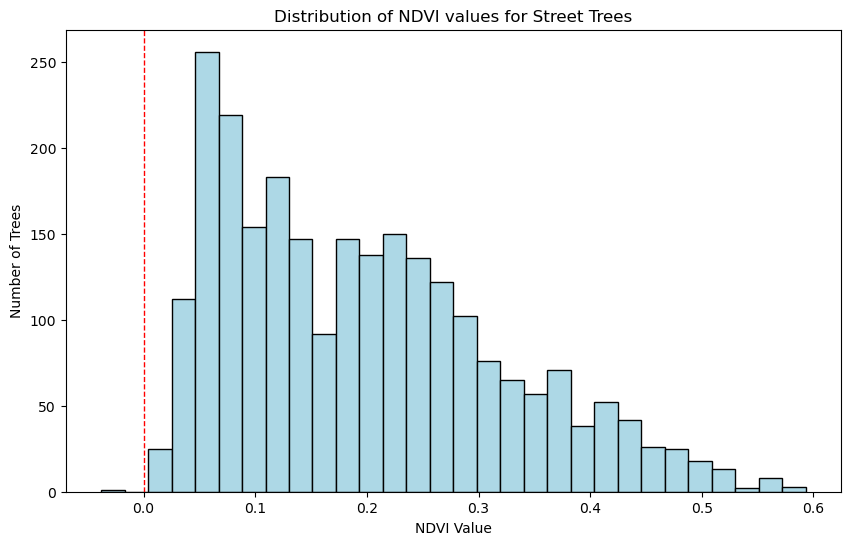

In [92]:
## 1. Histogram of NDVI values
# Set up the figure and axis

plt.figure(figsize=(10,6))
plt.hist(stats, bins=30, color='lightblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='dashed', linewidth=1)  # NDVI = 0 threshold
plt.title('Distribution of NDVI values for Street Trees')
plt.xlabel('NDVI Value')
plt.ylabel('Number of Trees')
plt.show()


<module 'matplotlib.pyplot' from 'D:\\Anaconda\\Install\\envs\\musa-550-fall-2023\\lib\\site-packages\\matplotlib\\pyplot.py'>

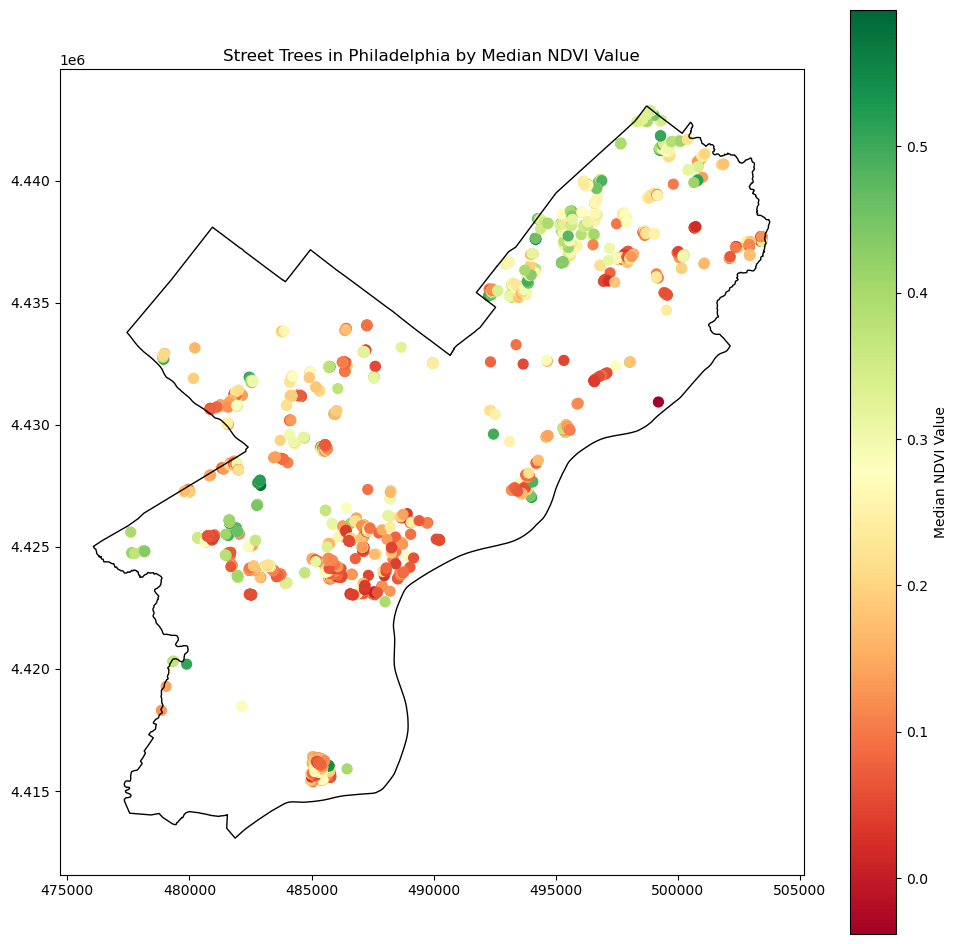

In [93]:
## 2. Another plot
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the city limits
city_limits.boundary.plot(ax=ax, color='black', linewidth=1)

# Plot street trees by NDVI
street_trees.plot(column='median_NDVI', ax=ax, legend=True, markersize=50, cmap='RdYlGn', legend_kwds={'label': "Median NDVI Value"})

# Title
ax.set_title("Street Trees in Philadelphia by Median NDVI Value")

plt